<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#¿Qué-son-los-problemas-de-clasificación-de-Clases-desequilibradas?-(imbalanced-data)" data-toc-modified-id="¿Qué-son-los-problemas-de-clasificación-de-Clases-desequilibradas?-(imbalanced-data)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>¿Qué son los problemas de clasificación de Clases desequilibradas? (imbalanced data)</a></span></li><li><span><a href="#¿Cómo-nos-afectan-los-datos-desbalanceados?" data-toc-modified-id="¿Cómo-nos-afectan-los-datos-desbalanceados?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>¿Cómo nos afectan los datos desbalanceados?</a></span></li><li><span><a href="#Manejo-del-desbalanceo-de-las-categorías" data-toc-modified-id="Manejo-del-desbalanceo-de-las-categorías-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Manejo del desbalanceo de las categorías</a></span><ul class="toc-item"><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Upsampling-y-downsampling-con-la-librería--imblearn" data-toc-modified-id="Upsampling-y-downsampling-con-la-librería--imblearn-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Upsampling y downsampling con la librería  <code>imblearn</code></a></span><ul class="toc-item"><li><span><a href="#Downsampling-con-imblearn" data-toc-modified-id="Downsampling-con-imblearn-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Downsampling con imblearn</a></span></li><li><span><a href="#Upsampling-con-imblearn" data-toc-modified-id="Upsampling-con-imblearn-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Upsampling con imblearn</a></span></li></ul></li></ul></li></ul></div>

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None


import warnings
warnings.filterwarnings('ignore')


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Para la clase de hoy tendremos que instalarnos 

```
pip install imblearn

o 

conda install -c conda-forge imbalanced-learn

```

# ¿Qué son los problemas de clasificación de Clases desequilibradas? (imbalanced data)


En los problemas de clasificación en donde tenemos que etiquetar por ejemplo entre “spam” o “not spam” ó entre múltiples categorías (coche, barco, avión) solemos encontrar que en nuestro conjunto de datos contamos con que alguna de las clases de muestra es una clase “minoritaria” es decir, de la cual tenemos muy poquitas muestras. Esto provoca un desbalanceo en los datos. 

Un caso evidente es en el área de Salud en donde solemos encontrar conjuntos de datos con miles de registros con pacientes “negativos” y unos pocos casos positivos es decir, que padecen la enfermedad que queremos clasificar.

# ¿Cómo nos afectan los datos desbalanceados?

Por lo general afecta a los algoritmos en su proceso de generalización de la información y perjudicando a las clases minoritarias. Esto suena bastante razonable: si a una red neuronal le damos 990 de fotos de gatitos y sólo 10 de perros, no podemos pretender que logre diferenciar una clase de otra. Lo más probable que la red se limite a responder siempre “tu foto es un gato” puesto que así tuvo un acierto del 99% en su fase de entrenamiento.

Desde Python, podremos soluciar estos problemas usando distintas aproximaciones, forma parte esencial de la parte de preprocesamiento de datos antes de realizar nuestras predicciones. Algunas de las más importantes son: 

- Downsampling


- Upsampling

- 

Para este jupyter vamos a usar un nuevo set de datos. En este caso, cada fila representa un cliente, cada columna contiene los atributos del cliente. El conjunto de datos incluye información sobre

- Clientes que se han dado de baja en el último mes - la columna se llama Churn. Tiene valores de Si/No


- Servicios que cada cliente ha contratado: teléfono, líneas múltiples, Internet, seguridad en línea, copia de seguridad en línea, protección de dispositivos, soporte técnico y transmisión de TV y películas


- Información de la cuenta del cliente: cuánto tiempo ha sido cliente, contrato, método de pago, facturación sin papel, cargos mensuales y cargos totales


- Información demográfica sobre los clientes: sexo, rango de edad y si tienen pareja y personas a su cargo



In [97]:
df = pd.read_csv("data/customer_churn.csv", index_col = 0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Exploremos un poco nuestra variable respuesta, la que queremos predecir:

In [98]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Como podemos ver, en nuestro dataset tenemos muchos No y pocos Si. Veamoslo graficamente:

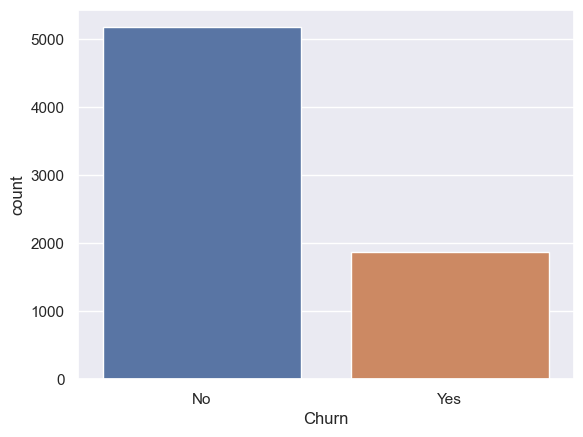

In [99]:
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x= "Churn");

# Manejo del desbalanceo de las categorías

## Downsampling

Lo ideal sería tener el mismo número de muestras de ambas clases, pero la realidad es que esto nos va a pasar pocas veces en nuestra vida como analistas. En este tipo de aproximación, desechamos una serie de muestras de forma aleatoria de la clase mayoritaria hasta que tenemos la misma cantidad de muestras de cada clase. 

Este enfoque puede ser peligroso por varias razones:

- Puede que dentro de la clase dominante haya diferentes "grupos" de muestras de los que no somos conscientes. Por lo tanto, si simplemente descartamos muestras al azar corremos el riesgo de subrepresentar uno de los grupos o de alterar las proporciones de muestras de cada grupo.



- Si la cantidad de muestras de la clase minoritaria es extremadamente pequeña, acabaremos con un conjunto de datos muy reducido que será demasiado pequeño para entrenar un modelo y, por tanto, no podremos confiar en él.



In [100]:
num_minoritarios = df["Churn"].value_counts()["Yes"]
num_minoritarios

1869

In [101]:
# nos creamos un dataframe solo con las filas donde la variable respuesta sea Yes. 
minoritarios = df[df["Churn"] == "Yes"]
minoritarios.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
# extraemos una muestra de la categoría mayoritaria que sea del mismo tamaño que la clase minotaria

mayoritarios = df[df["Churn"] == "No"].sample(num_minoritarios, random_state = 42)
mayoritarios.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2134,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,No
2693,Male,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.30,1414.80,No


In [103]:
# Ahora es el momento de unir los *dataframes*
balanceado = pd.concat([minoritarios,mayoritarios],axis = 0)
balanceado.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
# chequeamos como es nuestro dataframe ahora
balanceado["Churn"].value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

## Upsampling

Vamos a hacer un upsample de la clase minoritaria repitiendo las muestras de la clase minoritaria. Al contrario que en el caso anterior, si realizamos un muestreo ascendente estamos repitiendo muestras de la clase minoritaria hasta que terminemos con la misma cantidad de ambas clases.

Problemas que nos podemos encontrar cuando usamos este método: 

- Al repetir las muestras, no estamos añadiendo nueva información. Y el modelo resultante probablemente no será capaz de clasificar correctamente una muestra no vista de la clase minoritaria que no tenga una alta similitud con las muestras de nuestro conjunto de datos.

Para ello, podemos seguir utilizando la función `sample()` de Panda. Sin embargo, como vamos a repetir las muestras, necesitamos establecer la opción `replace=True` ( que por defecto está establecida en `False`).


In [105]:
num_mayoritarios = df["Churn"].value_counts()["No"]
num_mayoritarios

5174

In [106]:
# seleccionamos ls datos de la clase mayoritaria

mayoritarios2 = df[df["Churn"]== "No"]
mayoritarios2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [107]:
# hacemos un selección aleatoria de datos de la clase minoritaria, para tener el mismo número que la clase mayoritaria

minoritarios2 =df[df["Churn"]=="Yes"].sample(num_mayoritarios, replace=True)
minoritarios2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
301,Female,1,No,No,4,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,396.1,Yes
1998,Female,0,Yes,No,2,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,44.60,97.1,Yes


In [108]:
# unimos los dos dataframes

balanceado2 = pd.concat([mayoritarios2,minoritarios2], axis = 0)
balanceado2.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [109]:
balanceado2["Churn"].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

## Upsampling y downsampling con la librería  `imblearn`


En lugar de hacerlo manualmente, podemos utilizar la biblioteca `imblearn`. [Aquí](https://imbalanced-learn.org/stable/) os dejamos la documentación oficial por si quereis trastear con ella un poco más. 

### Downsampling con imblearn

In [110]:
# separamos los datos en X e y. Siendo X las variables predictoras e y  la variable a predecir. 

X = df[["tenure","SeniorCitizen","MonthlyCharges"]]
y = df["Churn"]

In [111]:
# iniciamos el método

down = RandomUnderSampler()

In [112]:
# ajustamos el modelo
X_down, y_down = down.fit_resample(X,y)

In [113]:
X_down.head()

,tenure,SeniorCitizen,MonthlyCharges
0,58,0,19.55
1,31,0,20.65
2,35,1,110.80
3,1,0,20.20
4,3,0,19.90


In [114]:
y_down.head()

0    No
1    No
2    No
3    No
4    No
Name: Churn, dtype: object

Si chequeamos los valores ahora...

In [115]:
y_down.value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

### Upsampling con imblearn

In [116]:
# iniciamos el método

upp = RandomOverSampler()

In [117]:
# como siempre, ajustamos el modelo

X_upp, y_upp = upp.fit_resample(X, y)

In [118]:
y_upp.value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64